- https://mst.mimuw.edu.pl/wyklady/rp2/wyklad.pdf
- https://ericmjl.github.io/essays-on-data-science/machine-learning/markov-models/
- https://towardsdatascience.com/markov-chain-analysis-and-simulation-using-python-4507cee0b06e
- https://stephens999.github.io/fiveMinuteStats/stationary_distribution.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initial state probability vector
p_init = np.array([[29 / 100, 7 / 10, 1 / 100]])
# if p_init.sum() == 1:
#     pass
# else:
#     print("Initial probability vector does not sum up to 1!")

In [3]:
# (normal) random probability transition matrix (of size N x N, where N is the number of states)
p_transition = np.zeros((p_init.shape[1], p_init.shape[1]))
for row in range(p_transition.shape[0]):
    p_transition[row] = np.random.lognormal(
        mean=0, sigma=1, size=len(p_transition[row])
    )
    # sum to 1
    p_transition[row] = p_transition[row] / p_transition[row].sum()

p_transition

array([[0.55863428, 0.20322394, 0.23814179],
       [0.52632908, 0.22192328, 0.25174764],
       [0.14782628, 0.77295168, 0.07922204]])

In [4]:
# tests
assert p_init.sum() == 1

tol = 7
for row in range(p_transition.shape[0]):
    assert p_transition[row].sum().round(tol) == 1

assert p_init.shape[1] == p_transition.shape[0] == p_transition.shape[1]

Def. Let $P$ be stochastic matrix. We call distribution $\pi$ on $E$, a stationary (unchangable), if $\pi P=\pi$ (i.e. for all $j\in E, \sum_{i\in E}{\pi_i p_{ij}=\pi_i}$).

Lets find stationary initial distribution. Note that:

$s_1 = s_0P,\, s_2=s_1P=(s_0P)P=s_0P^2\ldots s_n=s_0P^n$, 

where $s_0$ is initial distribution.

We can also refer to stationary distribution as $\lim_{n\rightarrow\infty}s_0P^n=\pi$


Because

$\begin{bmatrix}
    p_{1} & p_{2} & p_{3}
  \end{bmatrix} \times \begin{bmatrix}
    p_{11} & p_{12} & p_{13} \\
    p_{21} & p_{22} & p_{23} \\
    p_{31} & p_{32} & p_{33}
  \end{bmatrix}  $

gives us vector of sum of probabilities of going to given state, i.e.

$\begin{bmatrix}
    p_{1}\cdot p_{11} + p_{2}\cdot p_{21} + p_{3}\cdot p_{31}, & p_{1}\cdot p_{12} + p_{2}\cdot p_{22} + p_{3}\cdot p_{32}, & p_{1}\cdot p_{13} + p_{2}\cdot p_{23} + p_{3}\cdot p_{33},
  \end{bmatrix}$,

where $p_{1}\cdot p_{11} + p_{2}\cdot p_{21} + p_{3}\cdot p_{31}$ is probability of going to state $1$ from any given state, then, we can iterate this process further, until we recieve stationary distribution.

In [5]:
# @= and @ are new operators introduced in Python 3.5 performing matrix multiplication.
print(
    "Indeed, probabilities in vector s_i sum up to {}.".format(
        sum((p_init @ p_transition)[0])
    )
)

Indeed, probabilities in vector s_i sum up to 1.0000000000000002.


In [6]:
n = 75

p_state_t = [p_init[0]]

for _ in range(n):
    p_state_t.append(p_state_t[-1] @ p_transition)

state_distribution = pd.DataFrame(p_state_t)
state_distribution.head(15)

,0,1,2
0,0.290000,0.700000,0.010000
1,0.531913,0.222011,0.246077
2,0.450372,0.347572,0.202056
3,0.464400,0.324840,0.210760
4,0.461558,0.329374,0.209068
5,0.462107,0.328495,0.209398
6,0.462000,0.328667,0.209334
7,0.462021,0.328633,0.209346
8,0.462017,0.328640,0.209344
9,0.462017,0.328638,0.209344


Stationary distribution for states: [0.46201725 0.32863849 0.20934426]


<Axes: >

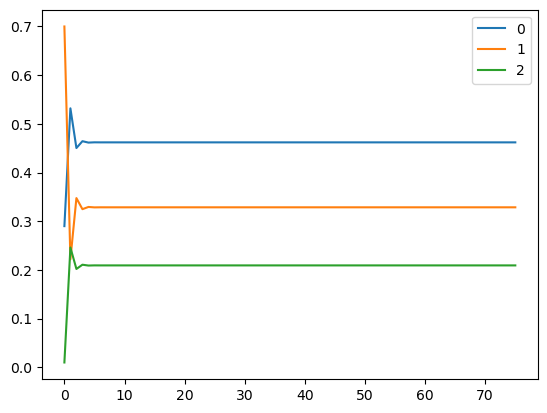

In [7]:
assert (
    state_distribution.tail(1).values
    == state_distribution.tail(1).values @ p_transition
).all()

print("Stationary distribution for states:", state_distribution.tail(1).values[0])
state_distribution.plot()

We can also use analytical formula:

$\pi = \pi P \iff \pi - \pi P = 0 \iff \pi(I-P)=0 \overset{(AB)^T=B^TA^T}{\iff} (\pi(I-P))^T=0^T \iff (I-P)^T\pi^T=0$,

where $\pi$ is a row vector of dimension of $n\times1$, $P$ is stochastic matrix with dimension of $n\times n$ and $n\in\mathbb{N}$ is the number of states. 

Next, because we know how to solve $Ax=b$, and we have linear constrains of $\sum_{i\in s}{\pi_i}=1$, then we can combine above with constrain to get:

$Ax=b,$

where $A = \begin{bmatrix}
    (I - P)^T    \\
    row\:of\:1's
  \end{bmatrix}$, $x = \pi^T$, and $b$ is column vector of 0's with 1 on in last row.

Example. Let $P = \begin{bmatrix}
    4 & 3 \\
    2 & 1
  \end{bmatrix}$ and $\pi = [p_1, p_2]$. Then, $(I-P)^T = \begin{bmatrix}
    -3 & -2 \\
    -3 & 0
  \end{bmatrix}$. Using the above, we should solve for $\begin{bmatrix}
    -3 & -3 \\
    -2 & 0 \\
    1 & 1
  \end{bmatrix}\times\begin{bmatrix}
    p_1 \\
    p_2 \\
  \end{bmatrix}=\begin{bmatrix}
    0 \\
    0 \\
    1
  \end{bmatrix}$.

In [78]:
n = p_transition.shape[0]
A = np.vstack([(np.identity(n) - p_transition).T, [1 for n in range(n)]])
b = np.array([0 for n in range(n)] + [1])
pi = np.linalg.lstsq(A, b)[0]
print(
    pi
)  # Return the least-squares solution to a linear matrix equation (numerical approach of solving linear equation).

[0.46201725 0.32863849 0.20934426]


C:\Users\User\AppData\Local\Temp\ipykernel_15456\47612078.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pi = np.linalg.lstsq(A, b)[0]


Comparing numerical vs analytical (with numerical matrix solving) approach of finding stationary distribution, shows (may be almost, because of the computations) same results.

In [88]:
print(
    "Numerical:  {} \n vs \nAnalytical: {}".format(
        state_distribution.tail(1).values[0], pi
    )
)

Numerical:  [0.46201725 0.32863849 0.20934426] 
 vs 
Analytical: [0.46201725 0.32863849 0.20934426]
